# 将自动站数据插值成智能网格模式的图

In [1]:
import pymssql 
import pandas as pd
## 数据库部分
#-----------------------------------------------------------------------------------------------------------------------------------
## sqlserver
server = "172.21.158.201"    # 连接服务器地址
user = "down"# 连接帐号
password = "downx"# 连接密码
conn = pymssql.connect(server, user, password, "ZJSZDZDB")  #获取连接


## data
sql_location1 ="select lat,b.lon,b.IIiii,RR from TAB_Mws2019 as a left join TAB_StationInfo as b on a.IIiii=b.IIiii where\
(b.IIiii in (select IIiii from TAB_StationInfo where(City = '台州') and tTime between '2019-08-09 23:00' and '2019-08-10 06:00'))"

sql_location2 ="select lat,b.lon,b.IIiii,RR from TAB_Aws2019 as a left join TAB_StationInfo as b on a.IIiii=b.IIiii where\
(b.IIiii in (select IIiii from TAB_StationInfo where(City = '台州') and tTime between '2019-08-09 23:00' and '2019-08-10 06:00'))"


df_location1 = pd.read_sql(sql_location1 , con=conn)
df_location2 = pd.read_sql(sql_location2 , con=conn)
station_all = pd.concat([df_location1,df_location2])
station_all.to_csv("station_all.csv")
grouped = station_all.groupby('IIiii')

# 存储最大降水的数据
data = {"name":[],"lat":[],"lon":[],"RMax":[]}
for i in grouped.size().index:
    data['name'].append(grouped.get_group(i)['IIiii'].iloc[0])
    data['lat'].append(grouped.get_group(i)['lat'].iloc[0])
    data['lon'].append(grouped.get_group(i)['lon'].iloc[0])
    data['RMax'].append(grouped.get_group(i)['RR'].max())

# data

#-----------------------------------------------------------------------------------------------------------------------------------

In [38]:
import pandas as pd
from scipy.interpolate import griddata
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from math import ceil, floor
%matplotlib inline


import numpy as np

import xarray as xr

import pandas as pd

import os

#-----------------------------------------------------------------------------------------------------------------------------------
lat = data['lat']
lon = data['lon']
RR = data['RMax']


N = len(RR)


a = []
b = []
z = []

for i in range(N):
    if RR[i]!=-9999.0:
        a.append(round(lon[i],2))
        b.append(round(lat[i],2))
        z.append(round(RR[i],2))
    else:
        print(RR[i])

lat = b
lon = a
Zi = z
data_max = max(Zi)
data_min = min(Zi)
print(data_min,data_max)
np.set_printoptions(precision = 2)
x = np.arange(120.0,122.0,0.05)
#print(x)
y = np.arange(27.8,29.5,0.05)
nx0 =len(x)
ny0 =len(y)
X, Y = np.meshgrid(x, y)#100*100

P = np.array([X.flatten(), Y.flatten() ]).transpose()
    
Pi =  np.array([lon, lat ]).transpose()

Z_linear = griddata(Pi, Zi, P, method = "linear").reshape([ny0,nx0])

#-----------------------------------------------------------------------------------------------------------------------------------


-9999
0 815


In [3]:
np.set_printoptions(precision = 2)  

data_tz = [
    {"lat":[28.05],"lon":[121.15,121.2]},
    {"lat":[28.01],"lon":[121.15,121.2,121.25]},
    {"lat":[28.15],"lon":[121.2,121.25]},
    {"lat":[28.20],"lon":[121.25,121.30,121.35]},
    {"lat":[28.25],"lon":[121.25,121.30,121.35,121.40,121.60]},
    {"lat":[28.30],"lon":[121.25,121.30,121.35,121.40,121.45,121.60]},
    {"lat":[28.35],"lon":[121.20,121.25,121.30,121.35,121.40,121.45,121.50,121.55,121.60]},
    {"lat":[28.40],"lon":[121.35,121.40,121.45,121.50,121.55,121.60]},
    {"lat":[28.45],"lon":[121.20,121.25,121.30,121.35,121.40,121.45,121.50,121.55]},
    {"lat":[28.50],"lon":[120.35,120.40,120.90,120.95,121.00,121.05,121.20,121.25,121.30,121.35,121.40,121.45,121.50,121.55,121,60]},
    {"lat":[28.55],"lon":[120.30,120.35,120.40,120.55,120.60,120.85,120.90,120.95,121.00,121.05,121.10,121.15,121.20,121.25,121.30,121.35,121.40,121.45,121.50,121.55]},
    {"lat":[28.60],"lon":list(np.arange(120.35,121.5,0.05))},
    {"lat":[28.65],"lon":list(np.arange(120.35,121.5,0.05))},
    {"lat":[28.70],"lon":list(np.arange(120.35,121.55,0.05))},
    {"lat":[28.75],"lon":list(np.arange(120.40,121.60,0.05))},
    {"lat":[28.80],"lon":list(np.arange(120.40,121.70,0.05))},
    {"lat":[28.85],"lon":list(np.arange(120.50,121.65,0.05))},
    {"lat":[28.90],"lon":list(np.arange(120.65,121.75,0.05))},
    {"lat":[28.95],"lon":list(np.arange(120.70,121.75,0.05))},
    {"lat":[29.00],"lon":list(np.arange(120.75,121.65,0.05))},
    {"lat":[29.05],"lon":list(np.arange(120.75,121.65,0.05))},
    {"lat":[29.10],"lon":list(np.arange(120.70,121.65,0.05))},
    {"lat":[29.15],"lon":[120.75,120.80,120.85,120.90,120.95,121.00,121.05,121.10,121.15,121.20,121.35,121.40,121.45]},
    {"lat":[29.20],"lon":list(np.arange(120.80,121.20,0.05))},
    {"lat":[29.25],"lon":list(np.arange(120.90,121.20,0.05))},
    {"lat":[29.30],"lon":list(np.arange(121.00,121.15,0.05))},
    
    
    
    
]

# 地形掩膜

In [4]:
from rasterio import features
from affine import Affine
import numpy as np
def transform_from_latlon(lat, lon):
    """ input 1D array of lat / lon and output an Affine transformation
    """
    lat = np.asarray(lat)
    lon = np.asarray(lon)
    trans = Affine.translation(lon[0], lat[0])
    scale = Affine.scale(lon[1] - lon[0], lat[1] - lat[0])
    return trans * scale

def rasterize(shapes, coords, latitude='lat', longitude='lon',
              fill=np.nan, **kwargs):
    """Rasterize a list of (geometry, fill_value) tuples onto the given
    xray coordinates. This only works for 1d latitude and longitude
    arrays.

    usage:
    -----
    1. read shapefile to geopandas.GeoDataFrame
          `states = gpd.read_file(shp_dir+shp_file)`
    2. encode the different shapefiles that capture those lat-lons as different
        numbers i.e. 0.0, 1.0 ... and otherwise np.nan
          `shapes = (zip(states.geometry, range(len(states))))`
    3. Assign this to a new coord in your original xarray.DataArray
          `ds['states'] = rasterize(shapes, ds.coords, longitude='X', latitude='Y')`

    arguments:
    ---------
    : **kwargs (dict): passed to `rasterio.rasterize` function

    attrs:
    -----
    :transform (affine.Affine): how to translate from latlon to ...?
    :raster (numpy.ndarray): use rasterio.features.rasterize fill the values
      outside the .shp file with np.nan
    :spatial_coords (dict): dictionary of {"X":xr.DataArray, "Y":xr.DataArray()}
      with "X", "Y" as keys, and xr.DataArray as values

    returns:
    -------
    :(xr.DataArray): DataArray with `values` of nan for points outside shapefile
      and coords `Y` = latitude, 'X' = longitude.


    """
    transform = transform_from_latlon(coords[latitude], coords[longitude])
    out_shape = (len(coords[latitude]), len(coords[longitude]))
    raster = features.rasterize(shapes, out_shape=out_shape,
                                fill=fill, transform=transform,
                                dtype=float, **kwargs)
    spatial_coords = {latitude: coords[latitude], longitude: coords[longitude]}
    return xr.DataArray(raster, coords=spatial_coords, dims=(latitude, longitude))

def add_shape_coord_from_data_array(xr_da, shp_path, coord_name):
    """ Create a new coord for the xr_da indicating whether or not it 
         is inside the shapefile

        Creates a new coord - "coord_name" which will have integer values
         used to subset xr_da for plotting / analysis/

        Usage:
        -----
        precip_da = add_shape_coord_from_data_array(precip_da, "awash.shp", "awash")
        awash_da = precip_da.where(precip_da.awash==0, other=np.nan) 
    """
    # 1. read in shapefile
    shp_gpd = gpd.read_file(shp_path)

    # 2. create a list of tuples (shapely.geometry, id)
    #    this allows for many different polygons within a .shp file (e.g. States of US)
    shapes = [(shape, n) for n, shape in enumerate(shp_gpd.geometry)]

    # 3. create a new coord in the xr_da which will be set to the id in `shapes`
    xr_da[coord_name] = rasterize(shapes, xr_da.coords, 
                               longitude='lon', latitude='lat')

    return xr_da

[ 0.   20.38 40.75 61.12 81.5 ]
shape: (34, 40)
type:: <class 'numpy.float64'> nan
len: 34 40
lon: [120.   120.05 120.1  120.15 120.2  120.25 120.3  120.35 120.4  120.45
 120.5  120.55 120.6  120.65 120.7  120.75 120.8  120.85 120.9  120.95
 121.   121.05 121.1  121.15 121.2  121.25 121.3  121.35 121.4  121.45
 121.5  121.55 121.6  121.65 121.7  121.75 121.8  121.85 121.9  121.95]
lat: [27.8  27.85 27.9  27.95 28.   28.05 28.1  28.15 28.2  28.25 28.3  28.35
 28.4  28.45 28.5  28.55 28.6  28.65 28.7  28.75 28.8  28.85 28.9  28.95
 29.   29.05 29.1  29.15 29.2  29.25 29.3  29.35 29.4  29.45]


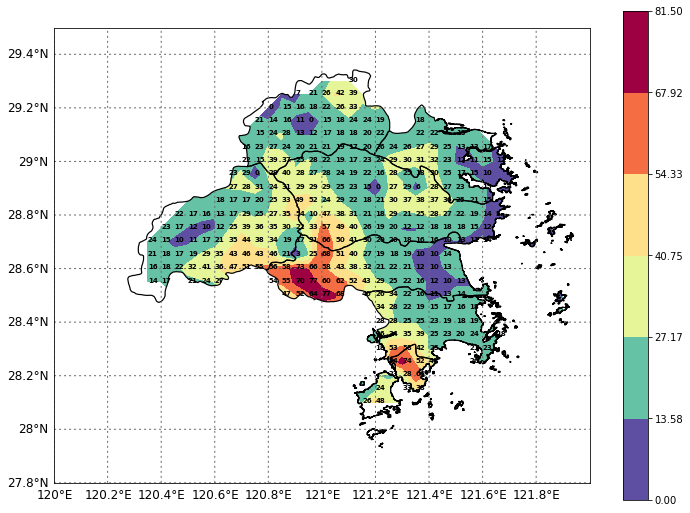

Type:           QuadContourSet
String form:    <matplotlib.contour.QuadContourSet object at 0x7f568e0549d0>
File:           /opt/conda/lib/python3.7/site-packages/matplotlib/contour.py
Docstring:     
Create and store a set of contour lines or filled regions.

User-callable method: `~axes.Axes.clabel`

Attributes
----------
ax
    The axes object in which the contours are drawn.

collections
    A silent_list of LineCollections or PolyCollections.

levels
    Contour levels.

layers
    Same as levels for line contours; half-way between
    levels for filled contours. See :meth:`_process_colors` method.
Init docstring:
Draw contour lines or filled regions, depending on
whether keyword arg *filled* is ``False`` (default) or ``True``.

Call signature::

    ContourSet(ax, levels, allsegs, [allkinds], **kwargs)

Parameters
----------
ax : `~.axes.Axes`
    The `~.axes.Axes` object to draw on.

levels : [level0, level1, ..., leveln]
    A list of floating point numbers indicating the conto

In [27]:
#coding=utf-8
from mpl_toolkits.basemap import Basemap
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import matplotlib.pyplot as plt
#from osgeo import gdal
import numpy as np
import cartopy.crs as ccrs
import shapefile
import matplotlib as mpl
import xarray as xr
from matplotlib.font_manager import FontProperties
import netCDF4 as nc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib
from math import isnan
import geopandas as gpd

from ncmaps import Cmaps

levels = np.linspace(start = data_min/10.0, stop = data_max/10.0, num = 7)#[10,20,30,40,50,60,70,80,90,100,110]

print(np.linspace(start = data_min/10.0, stop = data_max/10.0, num = 5))
self_define_list = [130,144,155,170,185,200,225,235,240,244]
rgb_file = 'ncl_default'
#以下是核心api,实质为调用Cmaps基类的listmap()方法
cmaps = Cmaps('ncl_default',self_define_list).listmap()

# plt.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=[12,18]) 
ax = fig.add_subplot(111)


def basemask(cs, ax, map, shpfile):

    sf = shapefile.Reader(shpfile)
    vertices = []
    codes = []
    for shape_rec in sf.shapeRecords():
        if shape_rec.record[0] >= 0:  
            pts = shape_rec.shape.points
            prt = list(shape_rec.shape.parts) + [len(pts)]
            for i in range(len(prt) - 1):
                for j in range(prt[i], prt[i+1]):
                    vertices.append(map(pts[j][0], pts[j][1]))
                codes += [Path.MOVETO]
                codes += [Path.LINETO] * (prt[i+1] - prt[i] -2)
                codes += [Path.CLOSEPOLY]
            clip = Path(vertices, codes)
            clip = PathPatch(clip, transform = ax.transData)    
    for contour in cs.collections:
        contour.set_clip_path(clip)    



def makedegreelabel(degreelist):
    labels=[str(x)+u'°E' for x in degreelist]
    return labels
filepath = "/home/liyuan3970/study_demo/met_plot/Basemap/"
# print(Z_linear.shape,x.shape)
data_xr = xr.DataArray(Z_linear/10.0, coords=[ y,x], 
                    dims=["lat", "lon"])
# data_xr = xr.DataArray(Z_linear.reshape([nx0,ny0]), coords=[ x,y], 
#                     dims=["lon", "lat"])
shp_da = add_shape_coord_from_data_array(data_xr, filepath+"taizhou.shp", "test")
awash_da = shp_da.where(shp_da.test<7, other=np.nan)

m = Basemap(llcrnrlon=120.0,
    llcrnrlat=27.8,
    urcrnrlon=122,
    urcrnrlat=29.5,
    resolution = None, 
    projection = 'cyl')


# 设置colorbar
cbar_kwargs = {
#'orientation': 'horizontal',
# 'label': 'Potential',
'shrink': 0.5,
}


cs = data_xr.plot.contourf(ax=ax, cmap='Spectral_r',levels =levels,cbar_kwargs=cbar_kwargs,add_labels=False)
# cs = data_xr.plot(ax=ax, cmap='Spectral_r',levels =levels )
cs?

m.readshapefile(filepath+'taizhou','taizhou',color='k',linewidth=1.2)
# plt.text(120.2,29.4,data_xr.data[0,1],fontsize= 6 ,color ="r")

parallels = np.arange(27.8,29.5,0.2)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[True,False,True,False],color='dimgrey',dashes=[2, 3],fontsize= 12)  # ha= 'right'
meridians = np.arange(120.0,122.0,0.2)
m.drawmeridians(meridians,labels=[False,True,False,True],color='dimgrey',dashes=[2, 3],fontsize= 12)
# plt.rcParams.update({'font.size':25})

print("shape:",data_xr.shape)        
print("type::",type(data_xr.data[0,1]),data_xr.data[0,1])    

len_lat = len(data_xr.lat.data)
len_lon = len(data_xr.lon.data)
print("len:",len_lat,len_lon)
print("lon:",data_xr.lon.data)
print("lat:",data_xr.lat.data)
# for i in range(len_lon-1):
#     for j in range(len_lat-1):
#         y0 = round(27.8+j*0.05,2)
#         x0 = round(120.0+i*0.05,2)
# #         print("66666",x0,y0,i,j)
#         if not isnan(data_xr.data[j,i]):
#             plt.text(x0,y0,str(round(data_xr.data[j,i],0)),fontsize= 4 ,color ="blue")

for i in range(len_lon-1):
    for j in range(len_lat-1):
        y0 = round(27.8+j*0.05,2)
        x0 = round(120.0+i*0.05,2)
#         print("66666",x0,y0,i,j)
        if not isnan(awash_da.data[j,i]):
            plt.text(x0,y0,str(int(awash_da.data[j,i])),fontsize= 7,fontweight = 800 ,color ="black")
            #plt.text(x0,y0,str(round(awash_da.data[j,i],1)),fontsize= 8 ,color ="blue")
basemask(cs, ax, m, filepath+'taizhou')         



plt.savefig("test.svg")

python: can't open file 'data.py': [Errno 2] No such file or directory


# 封装成函数

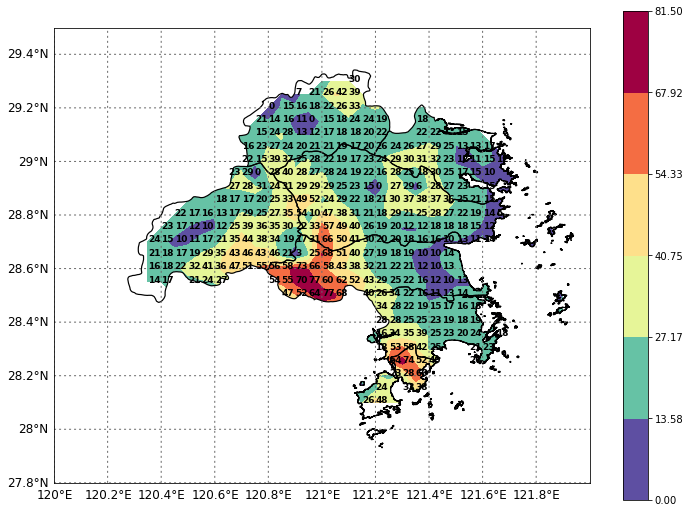

In [25]:
#coding=utf-8
from scipy.interpolate import griddata

import matplotlib as mpl
from math import ceil, floor
%matplotlib inline
from rasterio import features
from affine import Affine

import numpy as np

import xarray as xr

import pandas as pd

import os

from mpl_toolkits.basemap import Basemap
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import matplotlib.pyplot as plt
#from osgeo import gdal

import cartopy.crs as ccrs
import shapefile

from matplotlib.font_manager import FontProperties
import netCDF4 as nc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib
from math import isnan
import geopandas as gpd

from ncmaps import Cmaps

lat = data['lat']
lon = data['lon']
RR = data['RMax']

def transform_from_latlon(lat, lon):
    lat = np.asarray(lat)
    lon = np.asarray(lon)
    trans = Affine.translation(lon[0], lat[0])
    scale = Affine.scale(lon[1] - lon[0], lat[1] - lat[0])
    return trans * scale

def rasterize(shapes, coords, latitude='lat', longitude='lon',
              fill=np.nan, **kwargs):
    transform = transform_from_latlon(coords[latitude], coords[longitude])
    out_shape = (len(coords[latitude]), len(coords[longitude]))
    raster = features.rasterize(shapes, out_shape=out_shape,
                                fill=fill, transform=transform,
                                dtype=float, **kwargs)
    spatial_coords = {latitude: coords[latitude], longitude: coords[longitude]}
    return xr.DataArray(raster, coords=spatial_coords, dims=(latitude, longitude))

def add_shape_coord_from_data_array(xr_da, shp_path, coord_name):
    # 1. read in shapefile
    shp_gpd = gpd.read_file(shp_path)

    # 2. create a list of tuples (shapely.geometry, id)
    #    this allows for many different polygons within a .shp file (e.g. States of US)
    shapes = [(shape, n) for n, shape in enumerate(shp_gpd.geometry)]

    # 3. create a new coord in the xr_da which will be set to the id in `shapes`
    xr_da[coord_name] = rasterize(shapes, xr_da.coords, 
                               longitude='lon', latitude='lat')

    return xr_da


def basemask(cs, ax, map, shpfile):

    sf = shapefile.Reader(shpfile)
    vertices = []
    codes = []
    for shape_rec in sf.shapeRecords():
        if shape_rec.record[0] >= 0:  
            pts = shape_rec.shape.points
            prt = list(shape_rec.shape.parts) + [len(pts)]
            for i in range(len(prt) - 1):
                for j in range(prt[i], prt[i+1]):
                    vertices.append(map(pts[j][0], pts[j][1]))
                codes += [Path.MOVETO]
                codes += [Path.LINETO] * (prt[i+1] - prt[i] -2)
                codes += [Path.CLOSEPOLY]
            clip = Path(vertices, codes)
            clip = PathPatch(clip, transform = ax.transData)    
    for contour in cs.collections:
        contour.set_clip_path(clip)    



def makedegreelabel(degreelist):
    labels=[str(x)+u'°E' for x in degreelist]
    return labels


def plot_image(lat,lon,value):
    #线性插值
    N = len(RR)
    a = []
    b = []
    z = []
    for i in range(N):
        if RR[i]!=-9999.0:
            a.append(round(lon[i],2))
            b.append(round(lat[i],2))
            z.append(round(RR[i],2))
    lat = b
    lon     = a
    Zi = z
    data_max = max(Zi)
    data_min = min(Zi)
    np.set_printoptions(precision = 2)
    x = np.arange(120.0,122.0,0.05)
    #print(x)
    y = np.arange(27.8,29.5,0.05)
    nx0 =len(x)
    ny0 =len(y)
    X, Y = np.meshgrid(x, y)#100*100
    P = np.array([X.flatten(), Y.flatten() ]).transpose()    
    Pi =  np.array([lon, lat ]).transpose()
    Z_linear = griddata(Pi, Zi, P, method = "linear").reshape([ny0,nx0])
    #绘图
    levels = np.linspace(start = data_min/10.0, stop = data_max/10.0, num = 7)
    self_define_list = [130,144,155,170,185,200,225,235,240,244]
    rgb_file = 'ncl_default'
    #以下是核心api,实质为调用Cmaps基类的listmap()方法
    cmaps = Cmaps('ncl_default',self_define_list).listmap()
    # plt.rcParams.update({'font.size': 20})
    fig = plt.figure(figsize=[12,18]) 
    ax = fig.add_subplot(111)
    filepath = "/home/liyuan3970/study_demo/met_plot/Basemap/"
    data_xr = xr.DataArray(Z_linear/10.0, coords=[ y,x], 
                        dims=["lat", "lon"])
    shp_da = add_shape_coord_from_data_array(data_xr, filepath+"taizhou.shp", "test")
    awash_da = shp_da.where(shp_da.test<7, other=np.nan)
    m = Basemap(llcrnrlon=120.0,llcrnrlat=27.8,urcrnrlon=122,urcrnrlat=29.5,resolution = None, projection = 'cyl')
    # 设置colorbar
    cbar_kwargs = {'shrink': 0.5}    
    cs = data_xr.plot.contourf(ax=ax, cmap='Spectral_r',levels =levels,cbar_kwargs=cbar_kwargs,add_labels=False)
    m.readshapefile(filepath+'taizhou','taizhou',color='k',linewidth=1.2)
    parallels = np.arange(27.8,29.5,0.2)
    # labels = [left,right,top,bottom]
    m.drawparallels(parallels,labels=[True,False,True,False],color='dimgrey',dashes=[2, 3],fontsize= 12)  # ha= 'right'
    meridians = np.arange(120.0,122.0,0.2)
    m.drawmeridians(meridians,labels=[False,True,False,True],color='dimgrey',dashes=[2, 3],fontsize= 12)
    len_lat = len(data_xr.lat.data)
    len_lon = len(data_xr.lon.data)
    for i in range(len_lon-1):
        for j in range(len_lat-1):
            y0 = round(27.8+j*0.05,2)
            x0 = round(120.0+i*0.05,2)
            if not isnan(awash_da.data[j,i]):
                plt.text(x0,y0,str(int(awash_da.data[j,i])),fontsize= 9,fontweight = 800 ,color ="black")
    basemask(cs, ax, m, filepath+'taizhou')  
    

plot_image(lat,lon,RR)



# 距离权重插值方法

max: 815


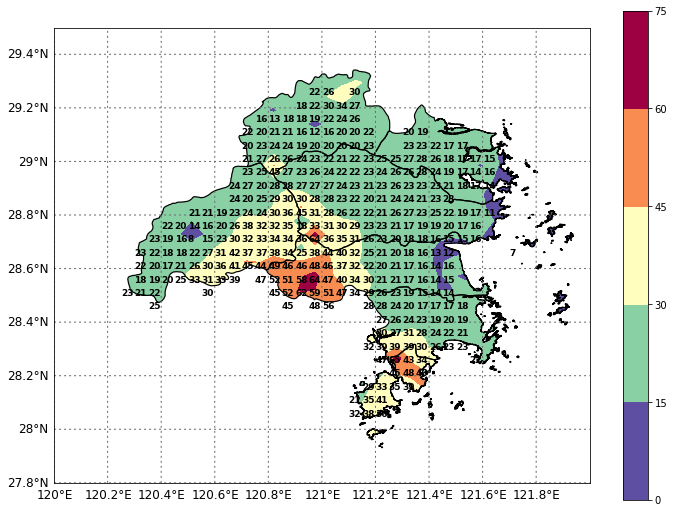

In [70]:
import math
import numpy as np
#更换求距离的函数
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    R =  6372.8
    dLon = radians(lon2 - lon1)
    dLat = radians(lat2 - lat1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))
    d = R * c
    return d

def IDW(x, y, z, xi, yi):
    lstxyzi = []
    for p in range(len(xi)):
        lstdist = []
        for s in range(len(x)):
            d = (haversine(x[s], y[s], xi[p], yi[p]))
            lstdist.append(d)
        sumsup = list((1 / np.power(lstdist, 2)))
        suminf = np.sum(sumsup)
        sumsup = np.sum(np.array(sumsup) * np.array(z))
        u = sumsup / suminf
        xyzi = [xi[p], yi[p], u]
        lstxyzi.append(xyzi)
    return(lstxyzi)

js_box = [120.0,27.8,122.0,29.5]
grid_lon = np.linspace(js_box[0],js_box[2],40)
grid_lat = np.linspace(js_box[1],js_box[3],34)

xgrid, ygrid = np.meshgrid(grid_lon, grid_lat)
#将插值网格数据整理
df_grid =pd.DataFrame(dict(long=xgrid.flatten(),lat=ygrid.flatten()))
#这里将数组转成列表
grid_lon_list = df_grid["long"].tolist()
grid_lat_list = df_grid["lat"].tolist()

data_idw = IDW(lon,lat,Zi,grid_lon_list,grid_lat_list)
IDW_grid_df = pd.DataFrame(data_idw,columns=["lon","lat","idw_value"])

idw_data = np.array(IDW_grid_df['idw_value'].tolist()).reshape([34,40])
idw_xr = xr.DataArray(idw_data/10.0, coords=[ grid_lat,grid_lon], 
                        dims=["lat", "lon"]) 
fig = plt.figure(figsize=[12,18]) 
ax = fig.add_subplot(111)
shp_da = add_shape_coord_from_data_array(idw_xr, filepath+"taizhou.shp", "test")
awash_da = shp_da.where(shp_da.test<7, other=np.nan)
m = Basemap(llcrnrlon=120.0,llcrnrlat=27.8,urcrnrlon=122,urcrnrlat=29.5,resolution = None, projection = 'cyl')
# 设置colorbar
cbar_kwargs = {'shrink': 0.5}    
cs =idw_xr.plot.contourf(ax=ax, cmap='Spectral_r',cbar_kwargs=cbar_kwargs,add_labels=False)
m.readshapefile(filepath+'taizhou','taizhou',color='k',linewidth=1.2)
parallels = np.arange(27.8,29.5,0.2)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[True,False,True,False],color='dimgrey',dashes=[2, 3],fontsize= 12)  # ha= 'right'
meridians = np.arange(120.0,122.0,0.2)
m.drawmeridians(meridians,labels=[False,True,False,True],color='dimgrey',dashes=[2, 3],fontsize= 12)
len_lat = len(idw_xr.lat.data)
len_lon = len(idw_xr.lon.data)
for i in range(len_lon-1):
    for j in range(len_lat-1):
        y0 = round(27.8+j*0.05,2)
        x0 = round(120.0+i*0.05,2)
        if not isnan(awash_da.data[j,i]):
            plt.text(x0,y0,str(int(awash_da.data[j,i])),fontsize= 9,fontweight = 800 ,color ="black")
basemask(cs, ax, m, filepath+'taizhou')  


print("max:",max(Zi))

In [62]:
test_data 

array([[272.36, 273.21, 274.09, ..., 253.68, 251.19, 248.99],
       [272.61, 273.52, 274.47, ..., 252.2 , 249.52, 247.2 ],
       [272.78, 273.75, 274.78, ..., 250.22, 247.38, 244.97],
       ...,
       [249.04, 248.45, 247.77, ..., 212.3 , 212.49, 212.83],
       [248.54, 247.94, 247.28, ..., 214.87, 214.9 , 215.07],
       [248.08, 247.49, 246.84, ..., 217.12, 217.03, 217.08]])

In [63]:
test_data.shape

(34, 40)

# 高斯插值

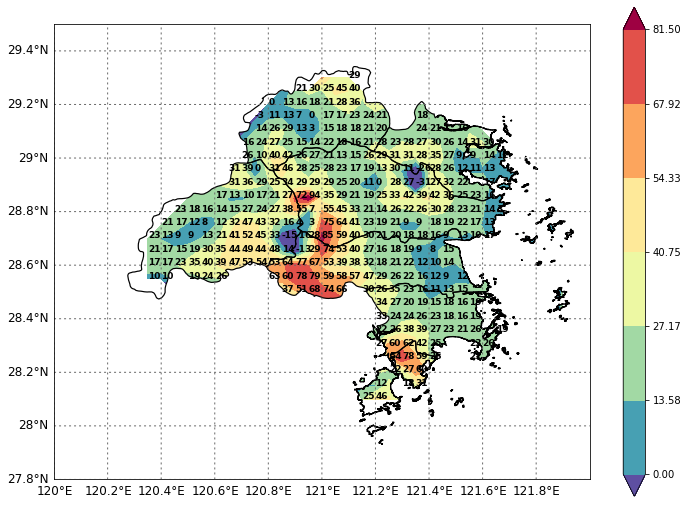

In [71]:
#coding=utf-8
from scipy.interpolate import griddata

import matplotlib as mpl
from math import ceil, floor
%matplotlib inline
from rasterio import features
from affine import Affine

import numpy as np

import xarray as xr

import pandas as pd

import os

from mpl_toolkits.basemap import Basemap
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import matplotlib.pyplot as plt
#from osgeo import gdal

import cartopy.crs as ccrs
import shapefile

from matplotlib.font_manager import FontProperties
import netCDF4 as nc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib
from math import isnan
import geopandas as gpd

from ncmaps import Cmaps

lat = data['lat']
lon = data['lon']
RR = data['RMax']

def transform_from_latlon(lat, lon):
    lat = np.asarray(lat)
    lon = np.asarray(lon)
    trans = Affine.translation(lon[0], lat[0])
    scale = Affine.scale(lon[1] - lon[0], lat[1] - lat[0])
    return trans * scale

def rasterize(shapes, coords, latitude='lat', longitude='lon',
              fill=np.nan, **kwargs):
    transform = transform_from_latlon(coords[latitude], coords[longitude])
    out_shape = (len(coords[latitude]), len(coords[longitude]))
    raster = features.rasterize(shapes, out_shape=out_shape,
                                fill=fill, transform=transform,
                                dtype=float, **kwargs)
    spatial_coords = {latitude: coords[latitude], longitude: coords[longitude]}
    return xr.DataArray(raster, coords=spatial_coords, dims=(latitude, longitude))

def add_shape_coord_from_data_array(xr_da, shp_path, coord_name):
    # 1. read in shapefile
    shp_gpd = gpd.read_file(shp_path)

    # 2. create a list of tuples (shapely.geometry, id)
    #    this allows for many different polygons within a .shp file (e.g. States of US)
    shapes = [(shape, n) for n, shape in enumerate(shp_gpd.geometry)]

    # 3. create a new coord in the xr_da which will be set to the id in `shapes`
    xr_da[coord_name] = rasterize(shapes, xr_da.coords, 
                               longitude='lon', latitude='lat')

    return xr_da


def basemask(cs, ax, map, shpfile):

    sf = shapefile.Reader(shpfile)
    vertices = []
    codes = []
    for shape_rec in sf.shapeRecords():
        if shape_rec.record[0] >= 0:  
            pts = shape_rec.shape.points
            prt = list(shape_rec.shape.parts) + [len(pts)]
            for i in range(len(prt) - 1):
                for j in range(prt[i], prt[i+1]):
                    vertices.append(map(pts[j][0], pts[j][1]))
                codes += [Path.MOVETO]
                codes += [Path.LINETO] * (prt[i+1] - prt[i] -2)
                codes += [Path.CLOSEPOLY]
            clip = Path(vertices, codes)
            clip = PathPatch(clip, transform = ax.transData)    
    for contour in cs.collections:
        contour.set_clip_path(clip)    



def makedegreelabel(degreelist):
    labels=[str(x)+u'°E' for x in degreelist]
    return labels


def plot_image(lat,lon,value):
    #线性插值
    N = len(RR)
    a = []
    b = []
    z = []
    for i in range(N):
        if RR[i]!=-9999.0:
            a.append(round(lon[i],2))
            b.append(round(lat[i],2))
            z.append(round(RR[i],2))
    lat = b
    lon     = a
    Zi = z
    data_max = max(Zi)
    data_min = min(Zi)
    np.set_printoptions(precision = 2)
    x = np.arange(120.0,122.0,0.05)
    #print(x)
    y = np.arange(27.8,29.5,0.05)
    nx0 =len(x)
    ny0 =len(y)
    X, Y = np.meshgrid(x, y)#100*100
    P = np.array([X.flatten(), Y.flatten() ]).transpose()    
    Pi =  np.array([lon, lat ]).transpose()
    Z_linear = griddata(Pi, Zi, P, method = "cubic").reshape([ny0,nx0])
    #绘图
    levels = np.linspace(start = data_min/10.0, stop = data_max/10.0, num = 7)
    self_define_list = [130,144,155,170,185,200,225,235,240,244]
    rgb_file = 'ncl_default'
    #以下是核心api,实质为调用Cmaps基类的listmap()方法
    cmaps = Cmaps('ncl_default',self_define_list).listmap()
    # plt.rcParams.update({'font.size': 20})
    fig = plt.figure(figsize=[12,18]) 
    ax = fig.add_subplot(111)
    filepath = "/home/liyuan3970/study_demo/met_plot/Basemap/"
    data_xr = xr.DataArray(Z_linear/10.0, coords=[ y,x], 
                        dims=["lat", "lon"])
    shp_da = add_shape_coord_from_data_array(data_xr, filepath+"taizhou.shp", "test")
    awash_da = shp_da.where(shp_da.test<7, other=np.nan)
    m = Basemap(llcrnrlon=120.0,llcrnrlat=27.8,urcrnrlon=122,urcrnrlat=29.5,resolution = None, projection = 'cyl')
    # 设置colorbar
    cbar_kwargs = {'shrink': 0.5}    
    cs = data_xr.plot.contourf(ax=ax, cmap='Spectral_r',levels =levels,cbar_kwargs=cbar_kwargs,add_labels=False)
    m.readshapefile(filepath+'taizhou','taizhou',color='k',linewidth=1.2)
    parallels = np.arange(27.8,29.5,0.2)
    # labels = [left,right,top,bottom]
    m.drawparallels(parallels,labels=[True,False,True,False],color='dimgrey',dashes=[2, 3],fontsize= 12)  # ha= 'right'
    meridians = np.arange(120.0,122.0,0.2)
    m.drawmeridians(meridians,labels=[False,True,False,True],color='dimgrey',dashes=[2, 3],fontsize= 12)
    len_lat = len(data_xr.lat.data)
    len_lon = len(data_xr.lon.data)
    for i in range(len_lon-1):
        for j in range(len_lat-1):
            y0 = round(27.8+j*0.05,2)
            x0 = round(120.0+i*0.05,2)
            if not isnan(awash_da.data[j,i]):
                plt.text(x0,y0,str(int(awash_da.data[j,i])),fontsize= 9,fontweight = 800 ,color ="black")
    basemask(cs, ax, m, filepath+'taizhou')  
    

plot_image(lat,lon,RR)



# 最邻近插值方法

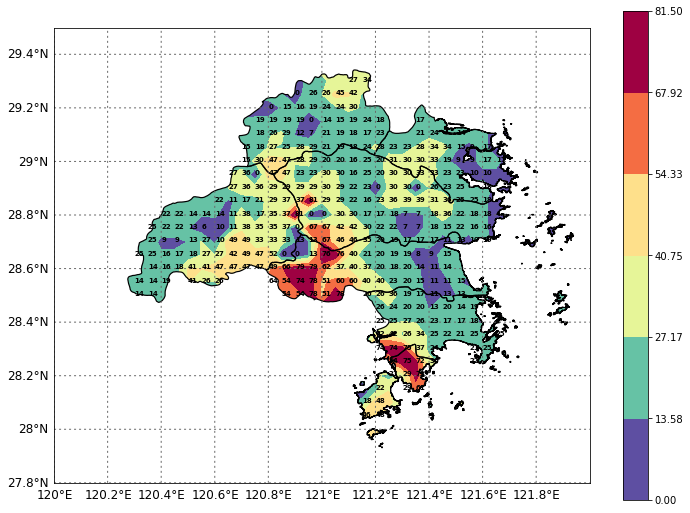

In [78]:
#coding=utf-8
from scipy.interpolate import griddata

import matplotlib as mpl
from math import ceil, floor
%matplotlib inline
from rasterio import features
from affine import Affine

import numpy as np

import xarray as xr

import pandas as pd

import os

from mpl_toolkits.basemap import Basemap
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import matplotlib.pyplot as plt
#from osgeo import gdal

import cartopy.crs as ccrs
import shapefile

from matplotlib.font_manager import FontProperties
import netCDF4 as nc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib
from math import isnan
import geopandas as gpd

from ncmaps import Cmaps

lat = data['lat']
lon = data['lon']
RR = data['RMax']

def transform_from_latlon(lat, lon):
    lat = np.asarray(lat)
    lon = np.asarray(lon)
    trans = Affine.translation(lon[0], lat[0])
    scale = Affine.scale(lon[1] - lon[0], lat[1] - lat[0])
    return trans * scale

def rasterize(shapes, coords, latitude='lat', longitude='lon',
              fill=np.nan, **kwargs):
    transform = transform_from_latlon(coords[latitude], coords[longitude])
    out_shape = (len(coords[latitude]), len(coords[longitude]))
    raster = features.rasterize(shapes, out_shape=out_shape,
                                fill=fill, transform=transform,
                                dtype=float, **kwargs)
    spatial_coords = {latitude: coords[latitude], longitude: coords[longitude]}
    return xr.DataArray(raster, coords=spatial_coords, dims=(latitude, longitude))

def add_shape_coord_from_data_array(xr_da, shp_path, coord_name):
    # 1. read in shapefile
    shp_gpd = gpd.read_file(shp_path)

    # 2. create a list of tuples (shapely.geometry, id)
    #    this allows for many different polygons within a .shp file (e.g. States of US)
    shapes = [(shape, n) for n, shape in enumerate(shp_gpd.geometry)]

    # 3. create a new coord in the xr_da which will be set to the id in `shapes`
    xr_da[coord_name] = rasterize(shapes, xr_da.coords, 
                               longitude='lon', latitude='lat')

    return xr_da


def basemask(cs, ax, map, shpfile):

    sf = shapefile.Reader(shpfile)
    vertices = []
    codes = []
    for shape_rec in sf.shapeRecords():
        if shape_rec.record[0] >= 0:  
            pts = shape_rec.shape.points
            prt = list(shape_rec.shape.parts) + [len(pts)]
            for i in range(len(prt) - 1):
                for j in range(prt[i], prt[i+1]):
                    vertices.append(map(pts[j][0], pts[j][1]))
                codes += [Path.MOVETO]
                codes += [Path.LINETO] * (prt[i+1] - prt[i] -2)
                codes += [Path.CLOSEPOLY]
            clip = Path(vertices, codes)
            clip = PathPatch(clip, transform = ax.transData)    
    for contour in cs.collections:
        contour.set_clip_path(clip)    



def makedegreelabel(degreelist):
    labels=[str(x)+u'°E' for x in degreelist]
    return labels


def plot_image(lat,lon,value):
    #线性插值
    N = len(RR)
    a = []
    b = []
    z = []
    for i in range(N):
        if RR[i]!=-9999.0:
            a.append(round(lon[i],2))
            b.append(round(lat[i],2))
            z.append(round(RR[i],2))
    lat = np.array(b)
    lon = np.array(a)
    Zi = np.array(z)
    data_max = max(Zi)
    data_min = min(Zi)
    np.set_printoptions(precision = 2)
    x = np.arange(120.0,122.0,0.05)
    #print(x)
    y = np.arange(27.8,29.5,0.05)
    nx0 =len(x)
    ny0 =len(y)
    X, Y = np.meshgrid(x, y)#100*100
    P = np.array([X.flatten(), Y.flatten() ]).transpose()    
    Pi =  np.array([lon, lat ]).transpose()
    Z_linear = griddata(Pi, Zi, P, method = "nearest").reshape([ny0,nx0])
    #绘图
    levels = np.linspace(start = data_min/10.0, stop = data_max/10.0, num = 7)
    self_define_list = [130,144,155,170,185,200,225,235,240,244]
    rgb_file = 'ncl_default'
    #以下是核心api,实质为调用Cmaps基类的listmap()方法
    cmaps = Cmaps('ncl_default',self_define_list).listmap()
    # plt.rcParams.update({'font.size': 20})
    fig = plt.figure(figsize=[12,18]) 
    ax = fig.add_subplot(111)
    filepath = "/home/liyuan3970/study_demo/met_plot/Basemap/"
    data_xr = xr.DataArray(Z_linear/10.0, coords=[ y,x], 
                        dims=["lat", "lon"])
    shp_da = add_shape_coord_from_data_array(data_xr, filepath+"taizhou.shp", "test")
    awash_da = shp_da.where(shp_da.test<7, other=np.nan)
    m = Basemap(llcrnrlon=120.0,llcrnrlat=27.8,urcrnrlon=122,urcrnrlat=29.5,resolution = None, projection = 'cyl')
    # 设置colorbar
    cbar_kwargs = {'shrink': 0.5}    
    cs = data_xr.plot.contourf(ax=ax, cmap='Spectral_r',levels =levels,cbar_kwargs=cbar_kwargs,add_labels=False)
    m.readshapefile(filepath+'taizhou','taizhou',color='k',linewidth=1.2)
    parallels = np.arange(27.8,29.5,0.2)
    # labels = [left,right,top,bottom]
    m.drawparallels(parallels,labels=[True,False,True,False],color='dimgrey',dashes=[2, 3],fontsize= 12)  # ha= 'right'
    meridians = np.arange(120.0,122.0,0.2)
    m.drawmeridians(meridians,labels=[False,True,False,True],color='dimgrey',dashes=[2, 3],fontsize= 12)
    len_lat = len(data_xr.lat.data)
    len_lon = len(data_xr.lon.data)
    for i in range(len_lon-1):
        for j in range(len_lat-1):
            y0 = round(27.8+j*0.05,2)
            x0 = round(120.0+i*0.05,2)
            if not isnan(awash_da.data[j,i]):
                plt.text(x0,y0,str(int(awash_da.data[j,i])),fontsize= 7,fontweight = 800 ,color ="black")
    basemask(cs, ax, m, filepath+'taizhou')  
    

plot_image(lat,lon,RR)
plt.savefig("test.svg")
